In [3]:
import tensorflow  # TensorFlow is a powerful open-source framework for machine learning tasks, including deep learning.
from tensorflow import keras # This line imports the Keras API from the TensorFlow library. Keras is a high-level API that simplifies building and training neural networks.
from tensorflow.keras import Sequential # This line imports the Sequential class from the Keras API. The Sequential class is used to define a basic neural network architecture where layers are stacked sequentially. This is suitable for simple neural networks that don't have complex branching or multiple inputs/outputs.
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape     # contains images from 0 to 59999. whose height & width are 28 * 28

(60000, 28, 28)

In [6]:
X_test.shape      # contains images from 0 to 59999. whose height & width are 28 * 28

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

8

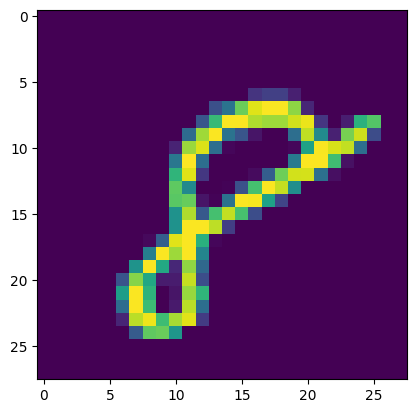

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[59999])                   # X_train showing image of 8
y_train[59999]                               # y_train showing actual label of image which is 8

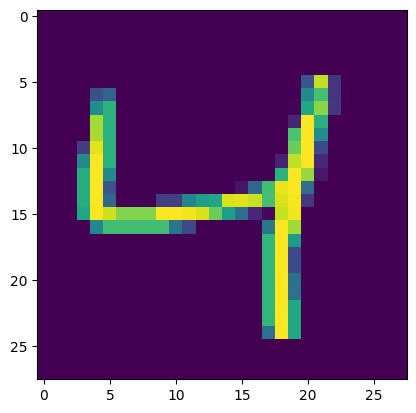

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [11]:
# for better prediction we are dividing data by its max number so that all data will be in range of 0 to 1

X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

dense layer = ((Image size is (28 * 28) * 128 neurons ) * 128 Bias) + 128 Bias = 100480 learning parameters

dense_1 layer = (128 neurons * 32 dense_1 ) + 32 Bias = 4128 learning parameters

dense_2 layer = (32 neurons * 10 dense_2 ) + 10 Bias = 330 learning parameters

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2944 - accuracy: 0.9150 - val_loss: 0.1658 - val_accuracy: 0.9517
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1250 - accuracy: 0.9629 - val_loss: 0.1126 - val_accuracy: 0.9675
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0850 - accuracy: 0.9738 - val_loss: 0.0996 - val_accuracy: 0.9697
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0638 - accuracy: 0.9802 - val_loss: 0.1001 - val_accuracy: 0.9721
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.1083 - val_accuracy: 0.9690
Epoch 6/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0928 - val_accuracy: 0.9756
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.1034 - val_accuracy

In [17]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [18]:
y_prob  # tells us probability of all 10000 Images from 0 to 10

array([[2.51958912e-21, 4.08080860e-16, 1.55086320e-16, ...,
        9.99999940e-01, 2.66558797e-19, 2.40609682e-15],
       [1.13393016e-24, 1.73125941e-11, 9.99999940e-01, ...,
        4.09830916e-25, 7.51386664e-15, 1.35998129e-25],
       [8.48449779e-15, 9.99999940e-01, 2.30549672e-12, ...,
        2.82668611e-10, 9.28116178e-12, 6.55026206e-15],
       ...,
       [2.11126203e-26, 7.39718299e-21, 1.45954479e-29, ...,
        1.36711804e-17, 3.30363626e-20, 9.04158137e-14],
       [2.24521824e-24, 2.83403613e-23, 4.15490737e-29, ...,
        4.59595097e-25, 5.19189311e-15, 8.01707234e-30],
       [3.53366305e-18, 6.62657297e-20, 1.79520547e-18, ...,
        3.29622345e-34, 2.25105665e-18, 1.01745935e-27]], dtype=float32)

In [23]:
# Tells us which index poisition, probability value is higher
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
y_prob[0] # 7th position probability value is higher

array([2.5195891e-21, 4.0808086e-16, 1.5508632e-16, 2.9255358e-13,
       1.4233808e-30, 2.3932799e-16, 1.8441792e-29, 9.9999994e-01,
       2.6655880e-19, 2.4060968e-15], dtype=float32)

In [27]:
y_test[0] # Image is actually 7 as a output tag

7

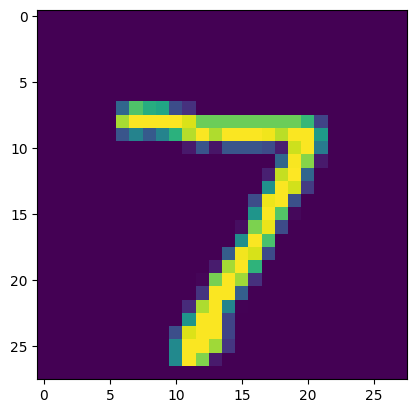

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])        # Image is also 7 as shown below

In [25]:
y_pred = y_prob.argmax(axis=1)

In [30]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)    # lets check difference between actual y_test tag and predicted y_pred. Near to 1 is good accuracy and very lesser issues

0.9773

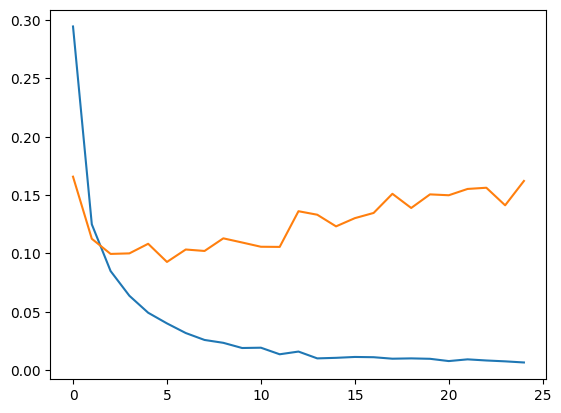

In [35]:
plt.plot(history.history['loss'])       # visible as elbow = Training loss
plt.plot(history.history['val_loss'])


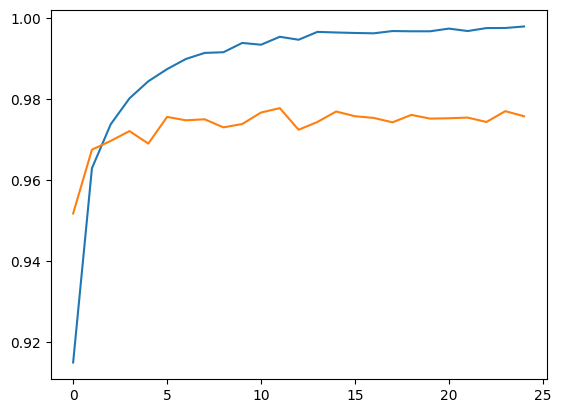

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

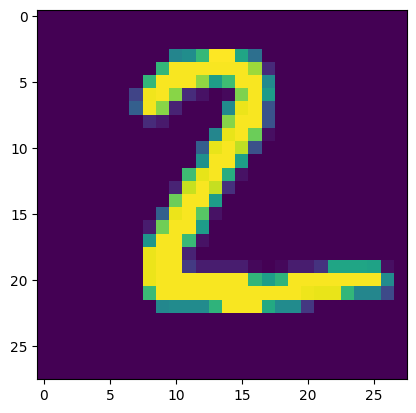

In [55]:
plt.imshow(X_test[1])

In [40]:
model.predict(X_test[1].reshape(1,28,28)) # from 0 to 9, 3rd prediction has high probability

1/1 [==============================] - 0s 24ms/step


array([[1.1339389e-24, 1.7312629e-11, 1.0000000e+00, 5.2496552e-20,
        7.9271967e-33, 3.0048850e-29, 9.4625979e-26, 4.0983094e-25,
        7.5138387e-15, 1.3599813e-25]], dtype=float32)

In [41]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1) # 3rd position means 2 is correct prediction as shown below in array

1/1 [==============================] - 0s 21ms/step


array([2])